In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
sns.set
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [129]:
df =pd.read_csv('Data science dataset.csv')
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [130]:
df.shape

(250000, 33)

In [131]:
df.duplicated().sum()

0

In [132]:
df.isnull().sum().sum()

0

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [134]:
df.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.416643,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.482458,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,9.000000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [135]:
Q1 = df.select_dtypes(exclude='object').quantile(0.25)
Q3 = df.select_dtypes(exclude='object').quantile(0.75)
IQR = Q3 - Q1
print(IQR)

EventId                        124999.500000
DER_mass_MMC                       52.505500
DER_mass_transverse_met_lep        54.357000
DER_mass_vis                       32.870250
DER_pt_h                           65.100250
DER_deltaeta_jet_jet              999.490000
DER_mass_jet_jet                 1082.446000
DER_prodeta_jet_jet               994.407000
DER_deltar_tau_lep                  1.151000
DER_pt_tot                         24.750000
DER_sum_pt                        122.928250
DER_pt_ratio_lep_tau                0.894000
DER_met_phi_centrality              2.596000
DER_lep_eta_centrality            999.000000
PRI_tau_pt                         20.425250
PRI_tau_eta                         1.823000
PRI_tau_phi                         3.140000
PRI_lep_pt                         21.015000
PRI_lep_eta                         1.973000
PRI_lep_phi                         3.140000
PRI_met                            30.497000
PRI_met_phi                         3.136000
PRI_met_su

In [136]:
def iqr_outlier_summary(df):
    results = {}
    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        results[col] = {
            "IQR": IQR,
            "Lower Bound": lower,
            "Upper Bound": upper,
            "Num Outliers": len(outliers),
            "% Outliers": round(100 * len(outliers) / len(df), 2)
        }

    return pd.DataFrame(results).T

outlier_summary = iqr_outlier_summary(df)  
print(outlier_summary)

                                       IQR   Lower Bound    Upper Bound  \
EventId                      124999.500000 -24999.500000  474998.500000   
DER_mass_MMC                     52.505500     -0.657500     209.364500   
DER_mass_transverse_met_lep      54.357000    -62.294500     155.133500   
DER_mass_vis                     32.870250     10.083375     141.564375   
DER_pt_h                         65.100250    -83.581625     176.819375   
DER_deltaeta_jet_jet            999.490000  -2498.235000    1499.725000   
DER_mass_jet_jet               1082.446000  -2622.669000    1707.115000   
DER_prodeta_jet_jet             994.407000  -2490.610500    1487.017500   
DER_deltar_tau_lep                1.151000      0.083500       4.687500   
DER_pt_tot                       24.750000    -34.284000      64.716000   
DER_sum_pt                      122.928250   -106.842375     384.870625   
DER_pt_ratio_lep_tau              0.894000     -0.458000       3.118000   
DER_met_phi_centrality   

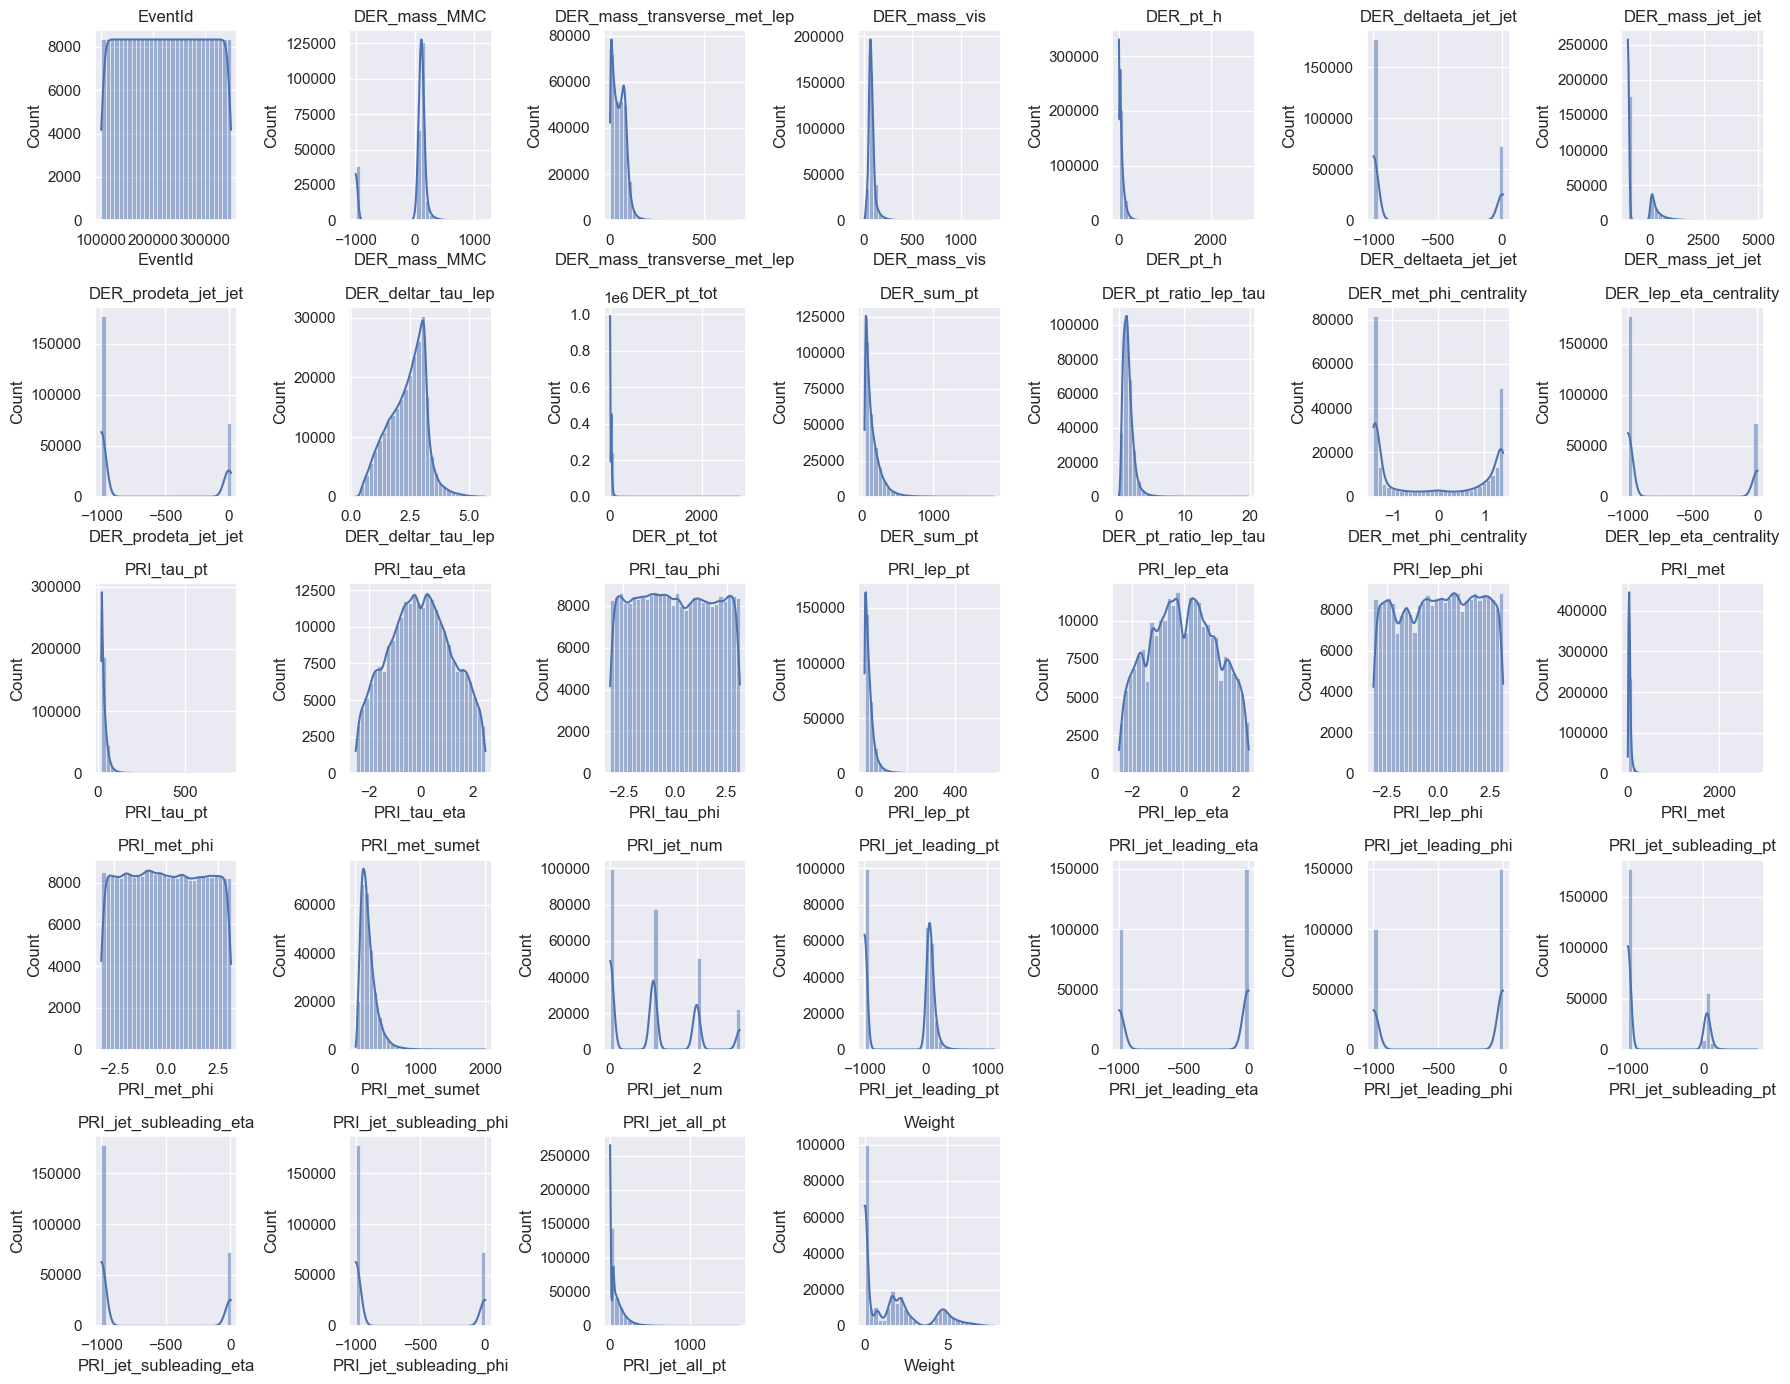

In [137]:
# Create subplot grid (adjust 5,7 as per your dataset size)
f,axes=plt.subplots(5,7,figsize=(18,14),dpi=100)
# Flatten axes for iteration
axes = axes.flatten()

# Select only numeric columns
num_cols = df.select_dtypes(exclude=['object']).columns

# Plot each numeric column
for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)

# Remove unused axes if dataset has fewer than 35 columns
for j in range(i+1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()


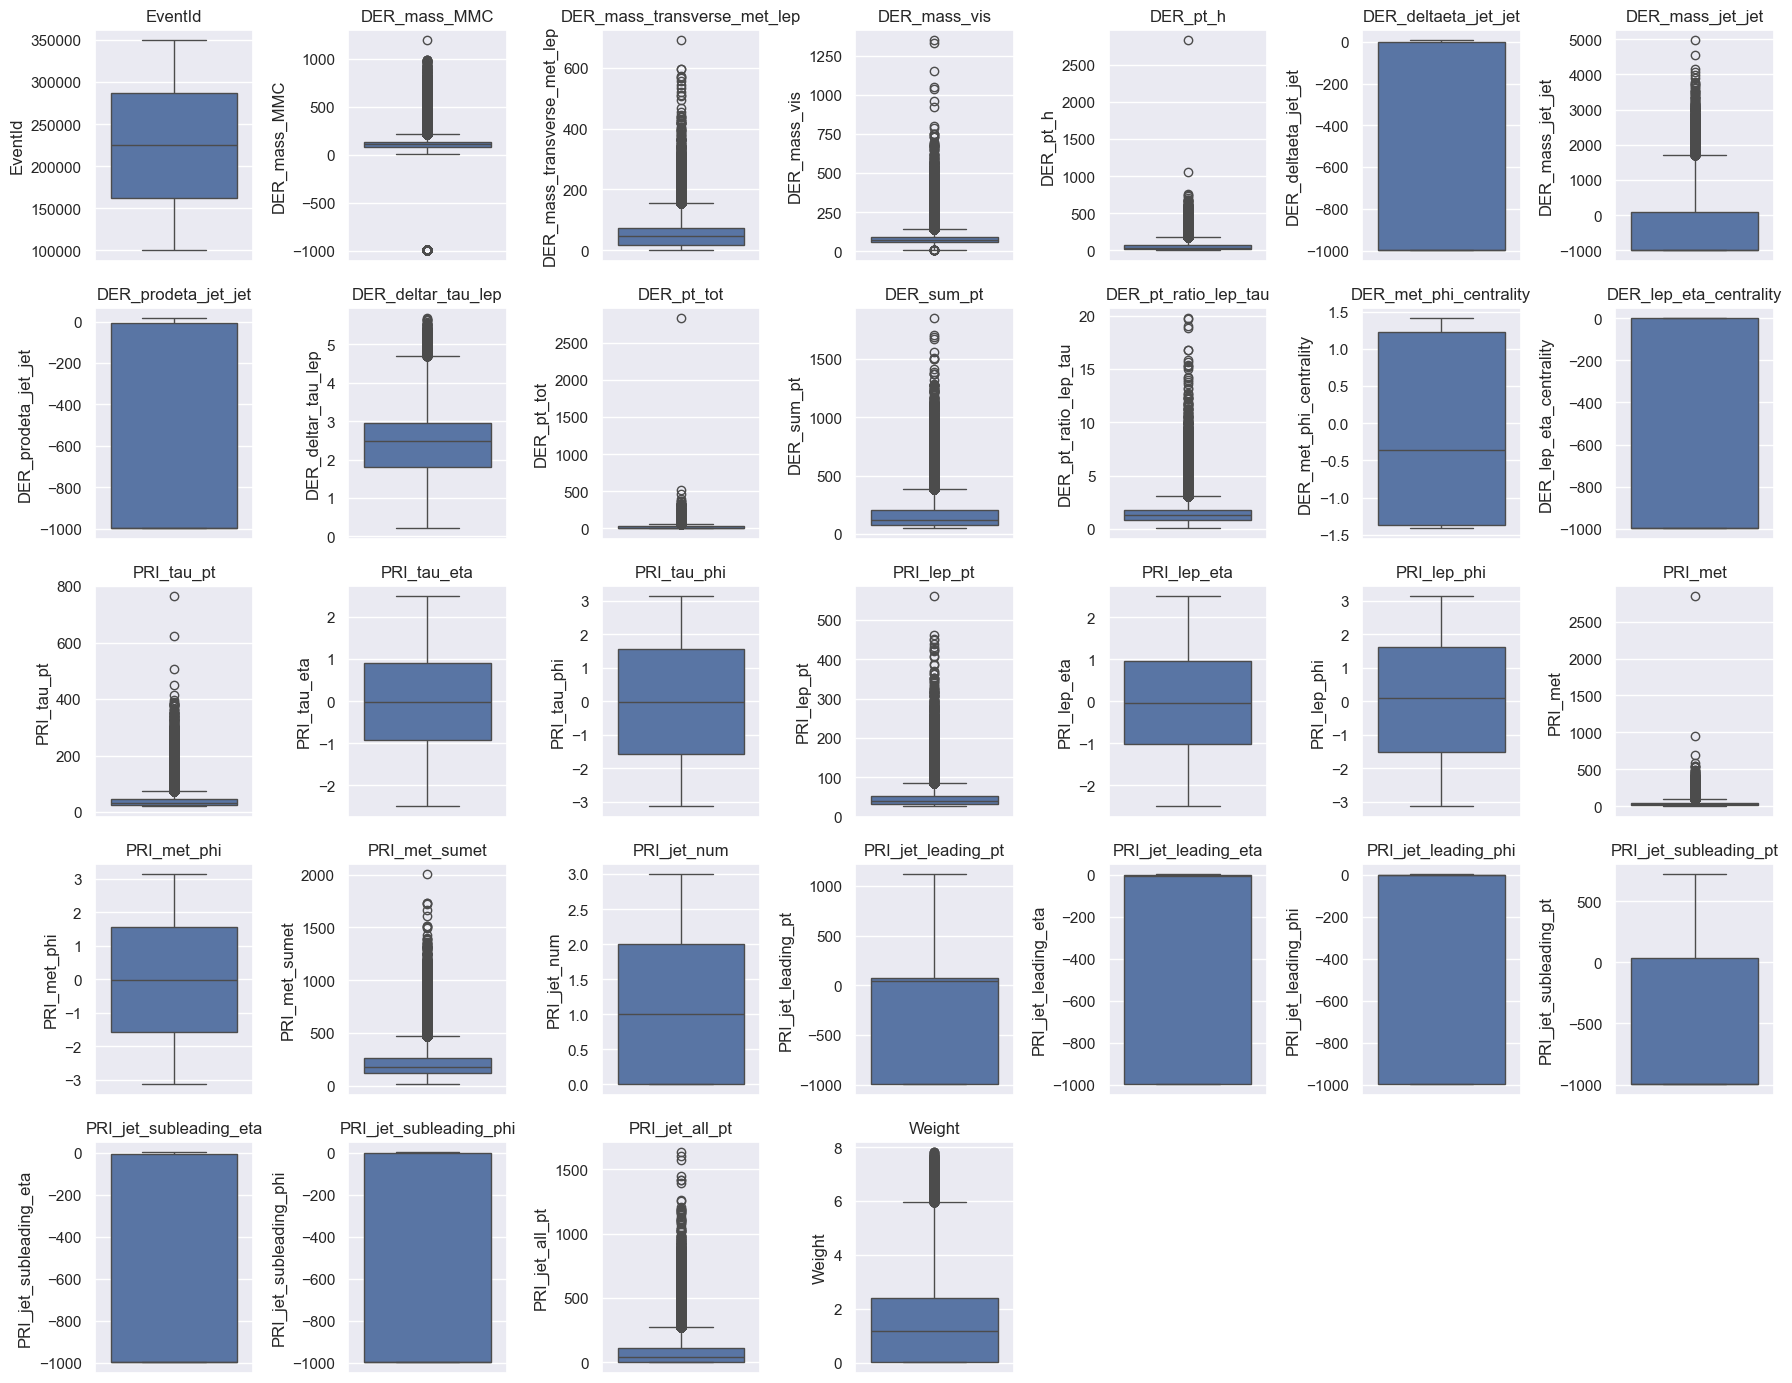

In [138]:

# Create subplot grid (adjust 5,7 as per your dataset size)
f,axes=plt.subplots(5,7,figsize=(18,14),dpi=100)
# Flatten axes for iteration
axes = axes.flatten()

# Select only numeric columns
num_cols = df.select_dtypes(exclude=['object']).columns

# Plot each numeric column
for i, col in enumerate(num_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove unused axes if dataset has fewer than 35 columns
for j in range(i+1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [139]:
df =df.replace(-999,np.nan)
df

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,NaN,NaN,NaN,3.473,2.078,...,1,46.226,0.725,1.158,NaN,NaN,NaN,46.226,2.233584,b
2,100002,NaN,162.172,125.953,35.635,NaN,NaN,NaN,3.148,9.336,...,1,44.251,2.053,-2.028,NaN,NaN,NaN,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,9.00,NaN,NaN,3.310,0.414,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,NaN,NaN,NaN,3.891,16.405,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,NaN,71.989,36.548,5.042,NaN,NaN,NaN,1.392,5.042,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,4.505083,b
249996,349996,NaN,58.179,68.083,22.439,NaN,NaN,NaN,2.585,22.439,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,NaN,NaN,NaN,2.390,22.183,...,1,41.992,1.800,-0.166,NaN,NaN,NaN,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,NaN,NaN,NaN,3.365,13.504,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.681611,b


In [140]:
df.isnull().sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177456
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

In [141]:
df.isnull().sum()/len(df)*100

EventId                         0.0000
DER_mass_MMC                   15.2456
DER_mass_transverse_met_lep     0.0000
DER_mass_vis                    0.0000
DER_pt_h                        0.0000
DER_deltaeta_jet_jet           70.9824
DER_mass_jet_jet               70.9828
DER_prodeta_jet_jet            70.9828
DER_deltar_tau_lep              0.0000
DER_pt_tot                      0.0000
DER_sum_pt                      0.0000
DER_pt_ratio_lep_tau            0.0000
DER_met_phi_centrality          0.0000
DER_lep_eta_centrality         70.9828
PRI_tau_pt                      0.0000
PRI_tau_eta                     0.0000
PRI_tau_phi                     0.0000
PRI_lep_pt                      0.0000
PRI_lep_eta                     0.0000
PRI_lep_phi                     0.0000
PRI_met                         0.0000
PRI_met_phi                     0.0000
PRI_met_sumet                   0.0000
PRI_jet_num                     0.0000
PRI_jet_leading_pt             39.9652
PRI_jet_leading_eta      

In [142]:
categorical_cols =df.select_dtypes(include=['object', 'category']).columns.tolist()
continuous_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols

['Label']

In [143]:
continuous_cols

['EventId',
 'DER_mass_MMC',
 'DER_mass_transverse_met_lep',
 'DER_mass_vis',
 'DER_pt_h',
 'DER_deltaeta_jet_jet',
 'DER_mass_jet_jet',
 'DER_prodeta_jet_jet',
 'DER_deltar_tau_lep',
 'DER_pt_tot',
 'DER_sum_pt',
 'DER_pt_ratio_lep_tau',
 'DER_met_phi_centrality',
 'DER_lep_eta_centrality',
 'PRI_tau_pt',
 'PRI_tau_eta',
 'PRI_tau_phi',
 'PRI_lep_pt',
 'PRI_lep_eta',
 'PRI_lep_phi',
 'PRI_met',
 'PRI_met_phi',
 'PRI_met_sumet',
 'PRI_jet_num',
 'PRI_jet_leading_pt',
 'PRI_jet_leading_eta',
 'PRI_jet_leading_phi',
 'PRI_jet_subleading_pt',
 'PRI_jet_subleading_eta',
 'PRI_jet_subleading_phi',
 'PRI_jet_all_pt',
 'Weight']

In [144]:
df['DER_mass_MMC']= df['DER_mass_MMC'].fillna(df['DER_mass_MMC'].mode()[0])

In [145]:
df['DER_deltaeta_jet_jet'] = df['DER_deltaeta_jet_jet'].fillna(df['DER_mass_MMC'].median())

In [146]:
df['DER_mass_jet_jet'] = df['DER_mass_jet_jet'].fillna(df['DER_mass_jet_jet'].median())

In [147]:
df['DER_lep_eta_centrality'] = df['DER_lep_eta_centrality'].fillna(df['DER_lep_eta_centrality'].median())

In [148]:
df['DER_prodeta_jet_jet'] =df['DER_prodeta_jet_jet'].fillna(df['DER_prodeta_jet_jet'].mode()[0])

In [149]:
df['PRI_jet_leading_pt'] =df['PRI_jet_leading_pt'].fillna(df['PRI_jet_leading_pt'].mode()[0])

In [150]:
df['PRI_jet_leading_eta'] =df['PRI_jet_leading_eta'].fillna(df['PRI_jet_leading_eta'].median())

In [151]:
df['PRI_jet_leading_phi'] =df['PRI_jet_leading_phi'].fillna(df['PRI_jet_leading_phi'].median())

In [152]:
df['PRI_jet_subleading_pt'] = df['PRI_jet_subleading_pt'].fillna(df['PRI_jet_subleading_pt'].median())

In [153]:
df['PRI_jet_subleading_eta'] = df['PRI_jet_subleading_eta'].fillna(df['PRI_jet_subleading_eta'].median())

In [154]:
df['PRI_jet_subleading_phi'] = df['PRI_jet_subleading_phi'].fillna(df['PRI_jet_subleading_phi'].median())

In [155]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

In [156]:
print('\n',df.Label.value_counts())


 Label
b    164333
s     85667
Name: count, dtype: int64


In [157]:
convert_binary = {"Label":    {"s": 0, "b": 1}  }
df=df.replace(convert_binary)

In [158]:
df['Label'].value_counts(normalize=True) * 100

Label
1    65.7332
0    34.2668
Name: proportion, dtype: float64

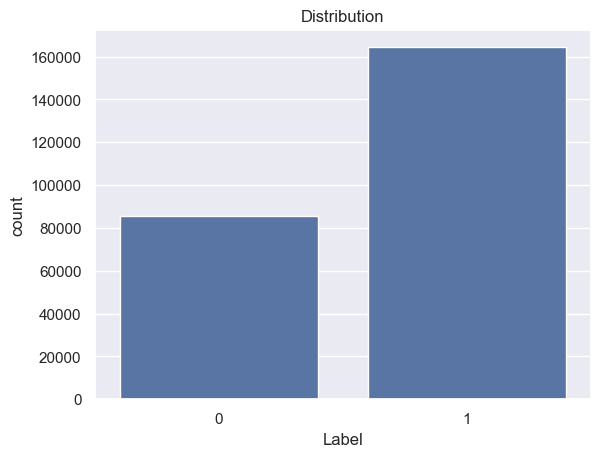

In [159]:
sns.countplot(x='Label', data=df)
plt.title('Distribution')
plt.show()

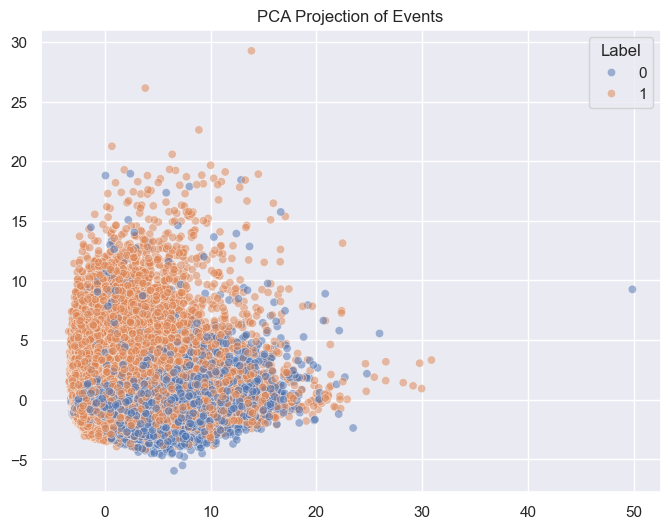

In [160]:

X = df.drop(columns=["EventId","Weight","Label"])
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df["Label"], alpha=0.5)
plt.title("PCA Projection of Events")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

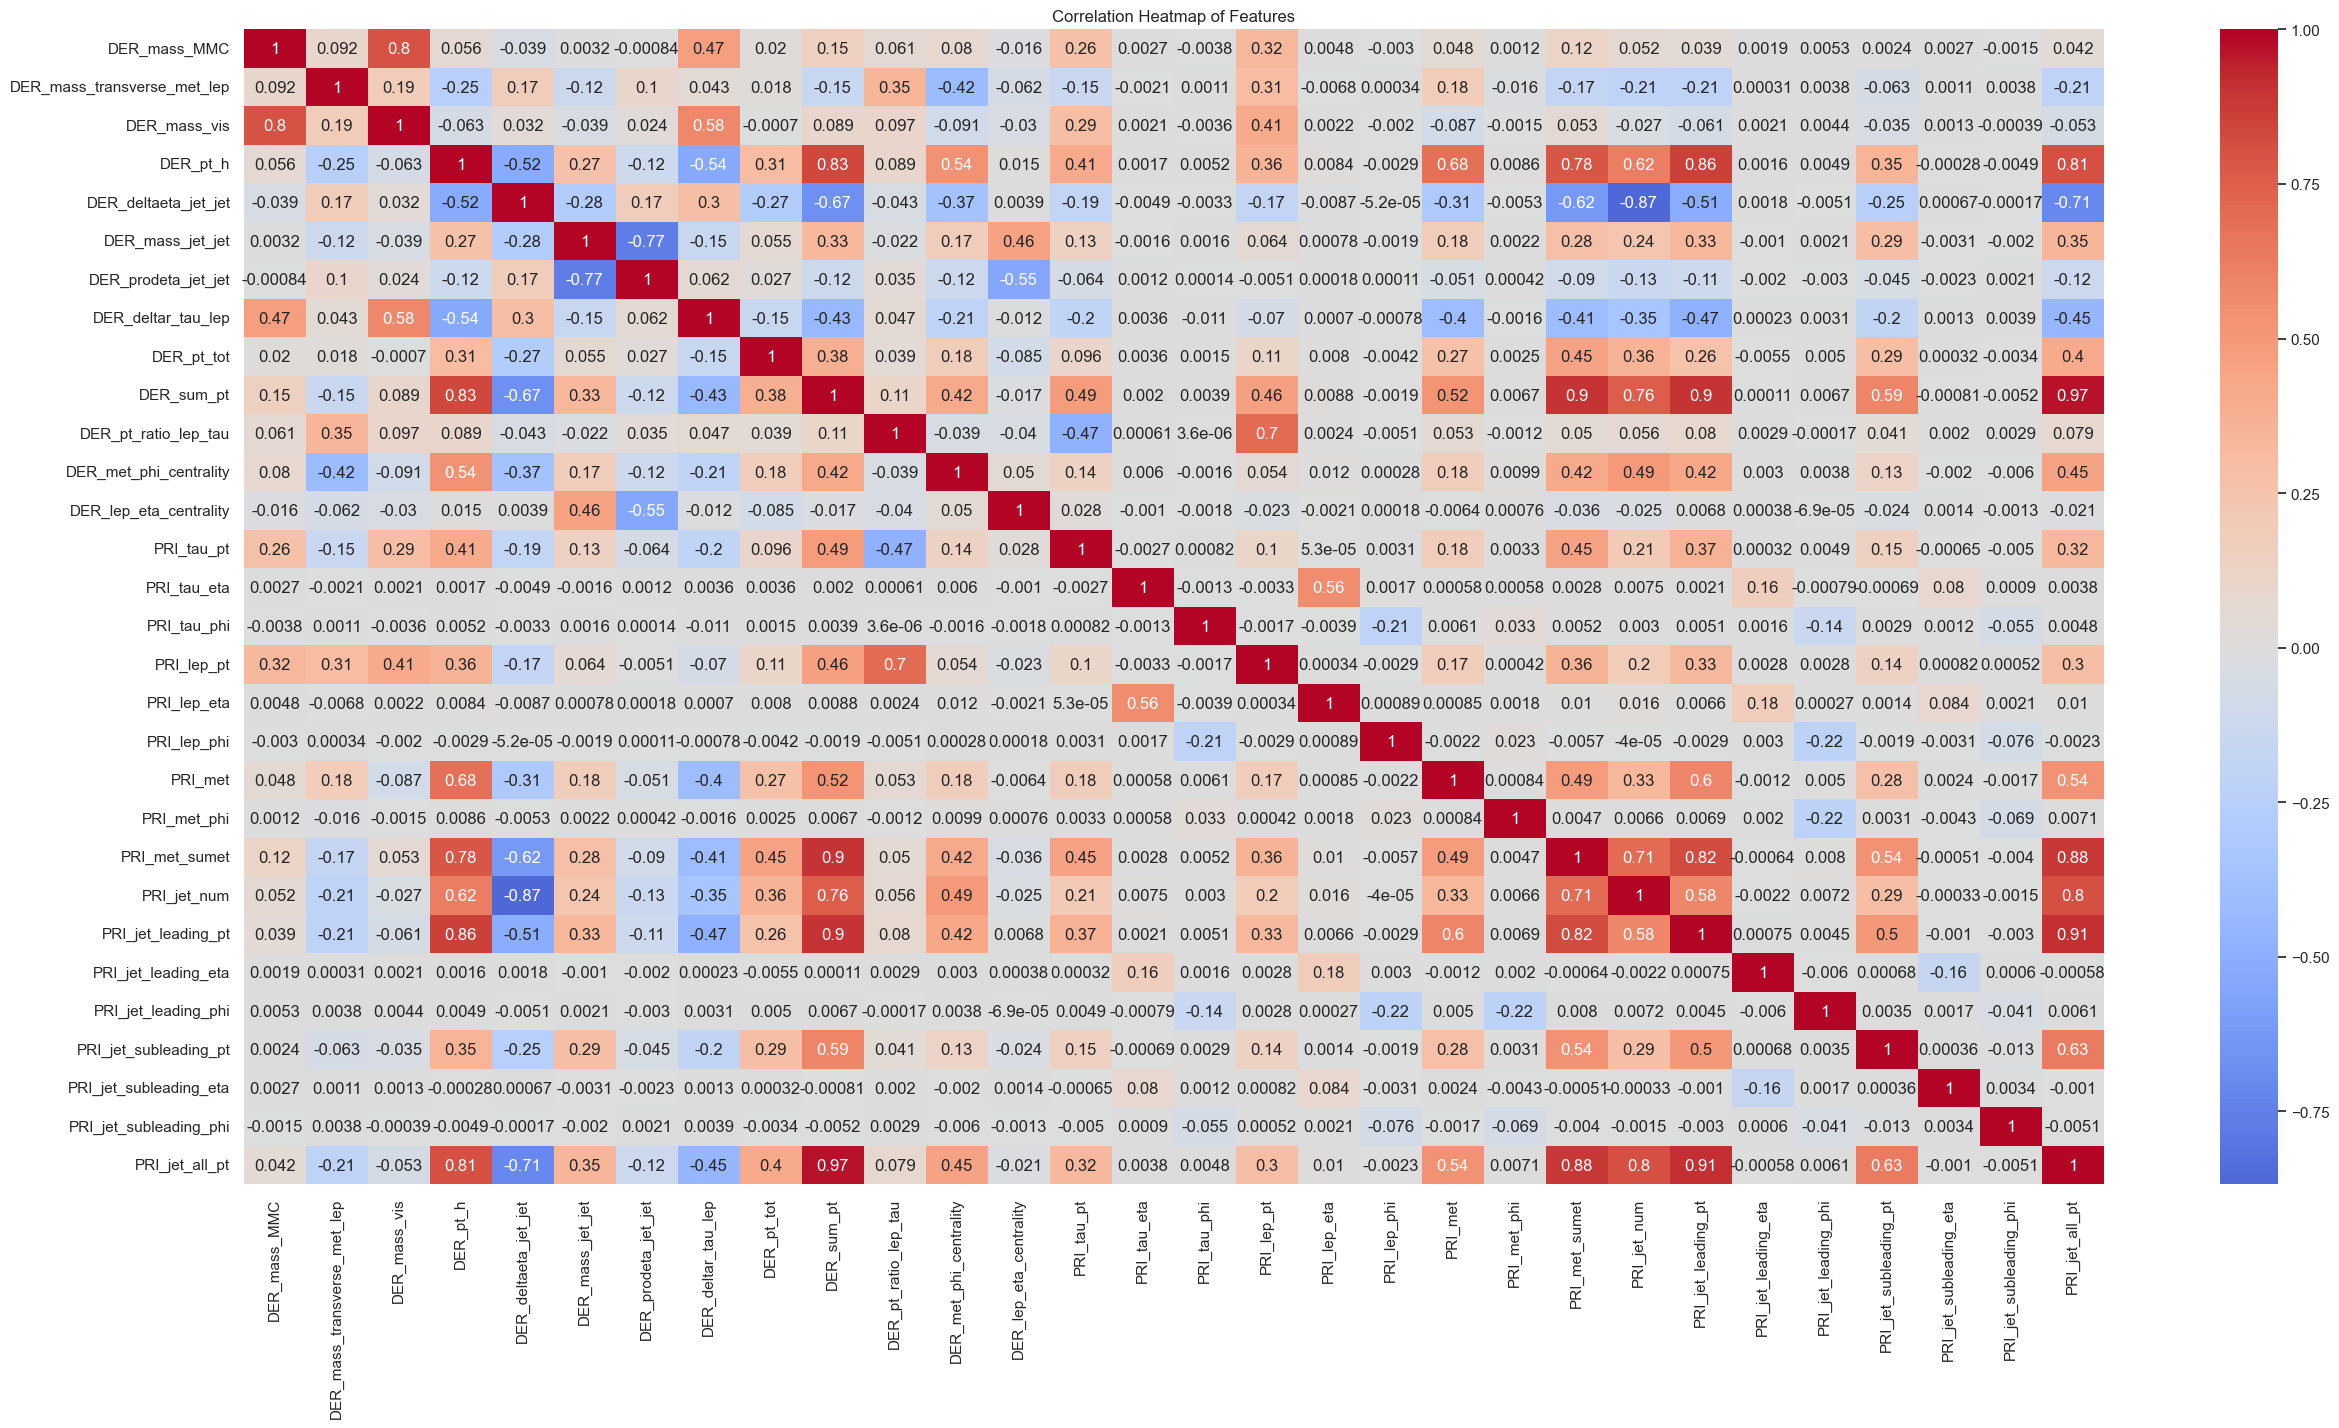

In [161]:
corr = df.drop(columns=["EventId","Weight","Label"]).corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot =True,cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Features")
plt.show

In [162]:
print(df.columns)

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')


In [163]:
df.drop(columns=['EventId'],inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DER_mass_MMC                 250000 non-null  float64
 1   DER_mass_transverse_met_lep  250000 non-null  float64
 2   DER_mass_vis                 250000 non-null  float64
 3   DER_pt_h                     250000 non-null  float64
 4   DER_deltaeta_jet_jet         250000 non-null  float64
 5   DER_mass_jet_jet             250000 non-null  float64
 6   DER_prodeta_jet_jet          250000 non-null  float64
 7   DER_deltar_tau_lep           250000 non-null  float64
 8   DER_pt_tot                   250000 non-null  float64
 9   DER_sum_pt                   250000 non-null  float64
 10  DER_pt_ratio_lep_tau         250000 non-null  float64
 11  DER_met_phi_centrality       250000 non-null  float64
 12  DER_lep_eta_centrality       250000 non-null  float64
 13 

In [165]:
x = df.drop('Label', axis=1)   # Features (remove target)
z = df['Label']                # Target

In [166]:
print(x.shape)  
print(z.shape)

(250000, 31)
(250000,)


In [167]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, z, test_size=0.2, random_state=42, stratify= z)

In [168]:
y_train.value_counts()

Label
1    131466
0     68534
Name: count, dtype: int64

In [169]:
y_test.value_counts()

Label
1    32867
0    17133
Name: count, dtype: int64

In [170]:
!pip install xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,classification_report, accuracy_score,confusion_matrix


In [171]:
#Logistic Regresison

logit= LogisticRegression(class_weight='balanced')
logit =logit.fit(x_train, y_train)
y_pred_LR = logit.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)

# RandomForest
rforest = RandomForestClassifier(class_weight='balanced', random_state=42)
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier(scale_pos_weight=7.5, use_label_encoder=False, eval_metric='logloss')
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

list1 = ['LogitRegession','RandomForest','XGBoost']
list2 = [accuracy_LR,accuracy_rf,accuracy_xg]
list3 = [logit,rforest,xgboost]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

      Method Used  Accuracy
0  LogitRegession   0.94546
1    RandomForest   1.00000
2         XGBoost   1.00000


In [172]:
precision = precision_score(y_test, y_pred_LR)
recall = recall_score(y_test, y_pred_LR)
f1 = f1_score(y_test, y_pred_LR)
roc_auc = roc_auc_score(y_test, y_pred_LR)
print("LogisticRegression")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print(classification_report(y_test, y_pred_LR))

LogisticRegression
Precision: 0.9935805056989389
Recall: 0.9229926674171661
F1 Score: 0.9569867032603038
ROC-AUC Score: 0.9557763780674228
              precision    recall  f1-score   support

           0       0.87      0.99      0.93     17133
           1       0.99      0.92      0.96     32867

    accuracy                           0.95     50000
   macro avg       0.93      0.96      0.94     50000
weighted avg       0.95      0.95      0.95     50000



In [173]:
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)
print("RandomForest")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print(classification_report(y_test, y_pred_rf))

RandomForest
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17133
           1       1.00      1.00      1.00     32867

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



In [174]:
precision = precision_score(y_test, y_pred_xg)
recall = recall_score(y_test, y_pred_xg)
f1 = f1_score(y_test, y_pred_xg)
roc_auc = roc_auc_score(y_test, y_pred_xg)
print("XGBoost")
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC-AUC Score:", roc_auc)
print(classification_report(y_test, y_pred_xg))

XGBoost
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17133
           1       1.00      1.00      1.00     32867

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000



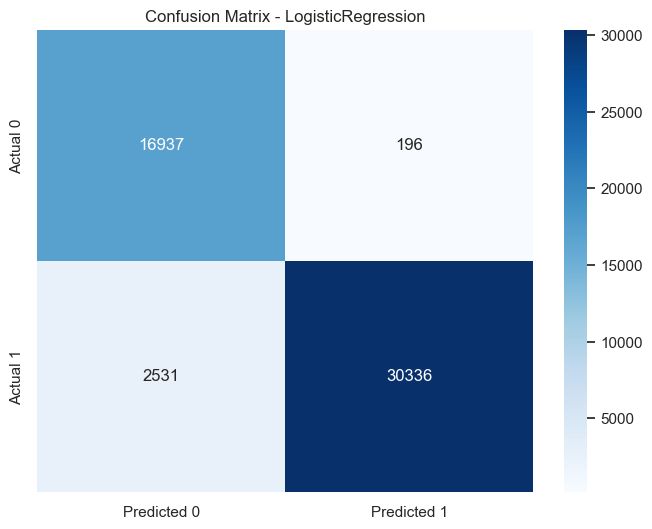

In [175]:
y_pred_LR = logit.predict(x_test)
cm = confusion_matrix(y_test, y_pred_LR)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LogisticRegression')
plt.show()

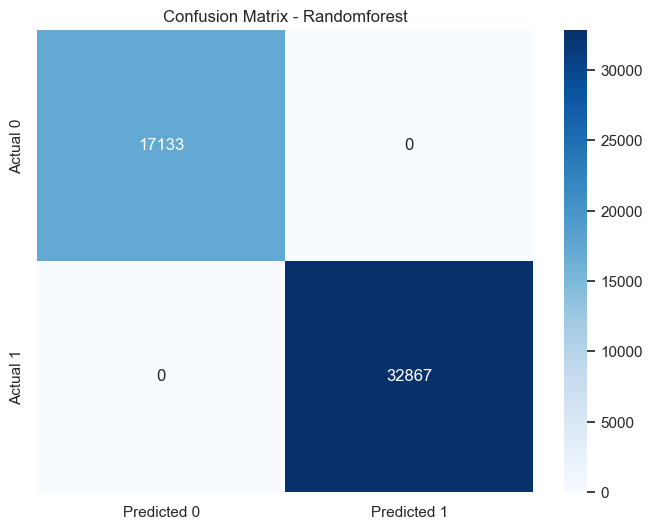

In [176]:
y_pred_rf = rforest.predict(x_test)
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Randomforest')
plt.show()


In [177]:
# Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

# Train the model
model = VotingClassifier(estimators = [('logit',logit), ('rforest',rforest),('xgboost',xgboost)])
model.fit(x_train, y_train)

# Predictions
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)   
    # Metrics
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)


print("************************")
print("Training Accuracy :",train_acc)
print("************************")
print("Test Accuracy :",test_acc)

************************
Training Accuracy : 1.0
************************
Test Accuracy : 1.0


# Cross Validation

In [178]:
from sklearn.model_selection import cross_val_score
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}
training = cross_val_score(model, x_train, y_train, cv=10,scoring='accuracy')
print("Training Accuracy :", training.mean())
print("***************")
print("Test Accuracy :",test_acc)

Training Accuracy : 1.0
***************
Test Accuracy : 1.0


In [179]:
training

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [180]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [181]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_resampled))

Before SMOTE: Counter({1: 131466, 0: 68534})
After SMOTE: Counter({0: 131466, 1: 131466})


In [182]:
#logistic Regression 
logit= LogisticRegression(class_weight='balanced')
logit =logit.fit(X_train_resampled, y_train_resampled)
y_pred_LR = logit.predict(x_test)
accuracy_LR = accuracy_score(y_test, y_pred_LR)

# RandomForest
rforest = RandomForestClassifier(class_weight='balanced', random_state=42)
rforest = rforest.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier(scale_pos_weight=7.5, use_label_encoder=False, eval_metric='logloss')
xgboost = xgboost.fit(X_train_resampled, y_train_resampled)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# Evaluation
print(" Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))

print(" Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print(" XGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))

 Logistic Regression:
Accuracy: 0.94486
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     17133
           1       0.99      0.93      0.96     32867

    accuracy                           0.94     50000
   macro avg       0.93      0.95      0.94     50000
weighted avg       0.95      0.94      0.95     50000

 Random Forest:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17133
           1       1.00      1.00      1.00     32867

    accuracy                           1.00     50000
   macro avg       1.00      1.00      1.00     50000
weighted avg       1.00      1.00      1.00     50000

 XGBoost:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17133
           1       1.00      1.00      1.00     32867

    accuracy                           1.00     50000
   macro avg       1.00      1.00 

                 Model  Accuracy
0  Logistic Regression   0.94486
1        Random Forest   1.00000
2              XGBoost   1.00000


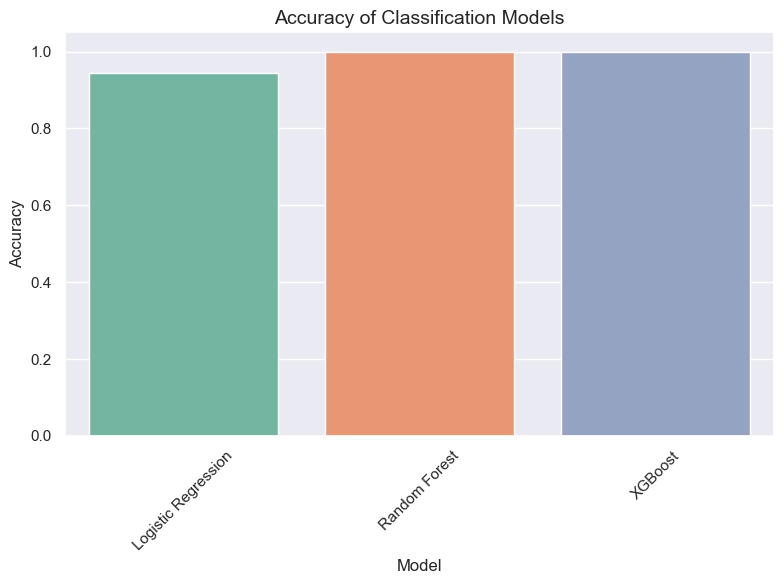

In [183]:
accuracy_data = [
    {'Model': 'Logistic Regression', 'Accuracy': accuracy_LR},
    {'Model': 'Random Forest', 'Accuracy': accuracy_rf},
    {'Model': 'XGBoost', 'Accuracy': accuracy_xg}
]

# Convert to DataFrame
accuracy_df = pd.DataFrame(accuracy_data)
print(accuracy_df)
#plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette='Set2')

plt.title('Accuracy of Classification Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

 Top 10 Important Features with Importance percentage:
                        Feature  Importance
30                       Weight    0.717986
0                  DER_mass_MMC    0.080239
1   DER_mass_transverse_met_lep    0.051506
13                   PRI_tau_pt    0.028532
2                  DER_mass_vis    0.022082
11       DER_met_phi_centrality    0.018669
10         DER_pt_ratio_lep_tau    0.012961
7            DER_deltar_tau_lep    0.009014
6           DER_prodeta_jet_jet    0.006881
12       DER_lep_eta_centrality    0.006016


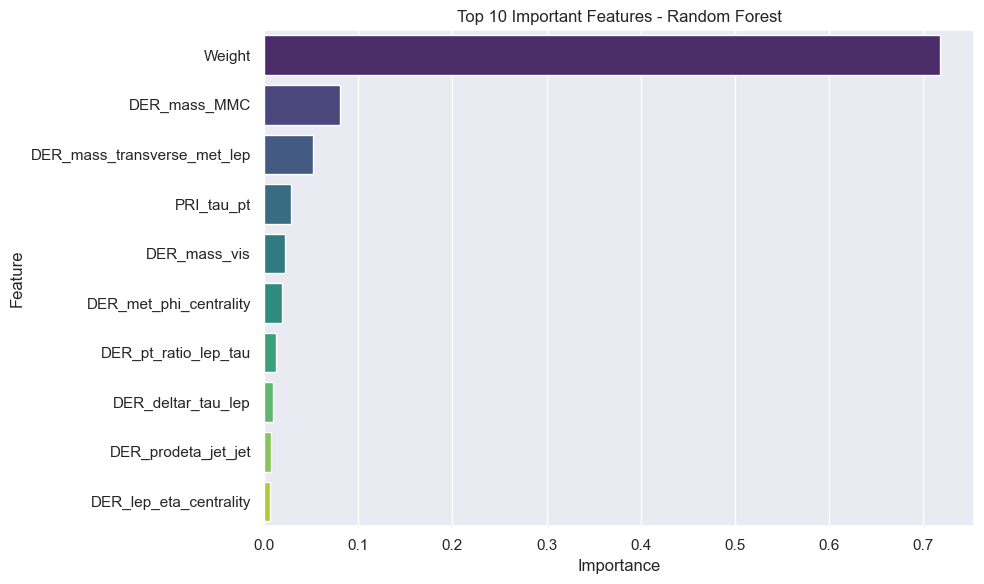

In [184]:
# Get feature importances from the trained model
importances = rforest.feature_importances_

# Get feature names from your training data
feature_names = X_train_resampled.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 important features
print(" Top 10 Important Features with Importance percentage:")
print(feature_importance_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features - Random Forest')
plt.tight_layout()
plt.show()
